In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, precision_score, recall_score, f1_score, log_loss
from numpy import clip, column_stack, argmax, vectorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import numpy as np

attributes = ['target_class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols','Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue','ProteinConcentration', 'Proline']
features = ['Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols','Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue','ProteinConcentration', 'Proline']
df = pd.read_csv('wine.data', names=attributes)

# Check if df has missing values
if df.isnull().values.any():
    print('The dataset has missing values')

# Check if df has duplicate rows
if df.duplicated().any():
    print('The dataset has duplicate rows')

# Check if df has duplicate columns
if df.columns.duplicated().any():
    print('The dataset has duplicate columns')

scaler = MinMaxScaler()
data = scaler.fit_transform(df[features])
data = df[features].to_numpy()

# Define X as all columns except 'target_class'
X = data
# Define y as the 'target_class' column
y = df['target_class']
y = y.to_numpy()

# random_state=42
# Split the data into training and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2)

In [106]:
print(precision_scores[40:60])

[0.25, 0.25, 0.1111111111111111, 0.6296296296296297, 0.6916666666666667, 0.8134920634920635, 0.1111111111111111, 0.07500000000000001, 0.07500000000000001, 0.1111111111111111, 0.9523809523809523, 0.6296296296296297, 0.7611111111111111, 0.6555555555555556, 0.9523809523809523, 0.5555555555555556, 0.5333333333333333, 0.6428571428571428, 0.8611111111111112, 0.9523809523809523]


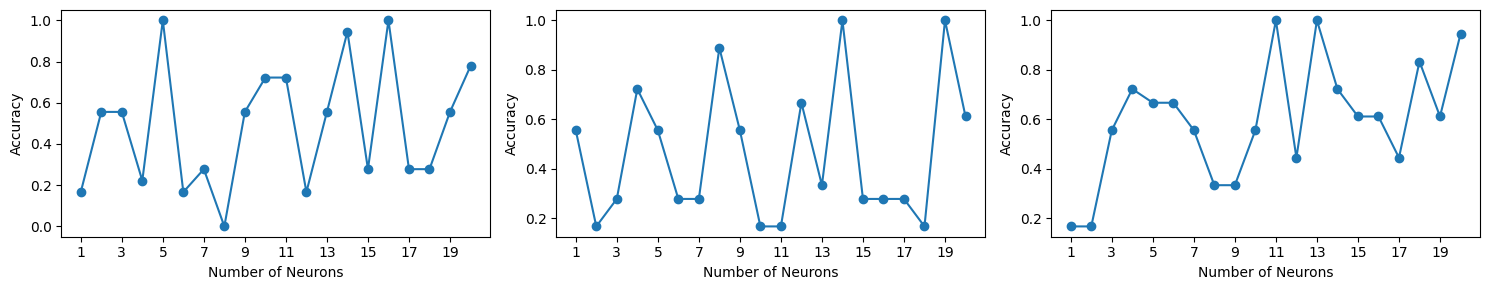

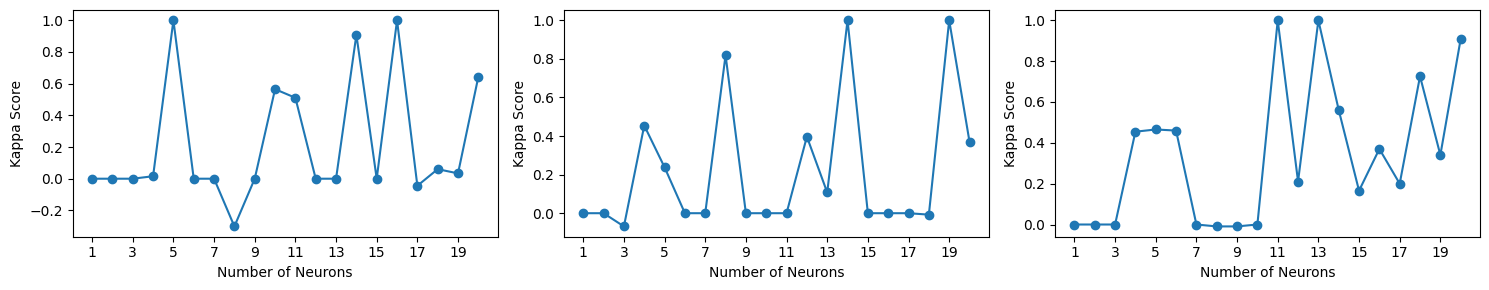

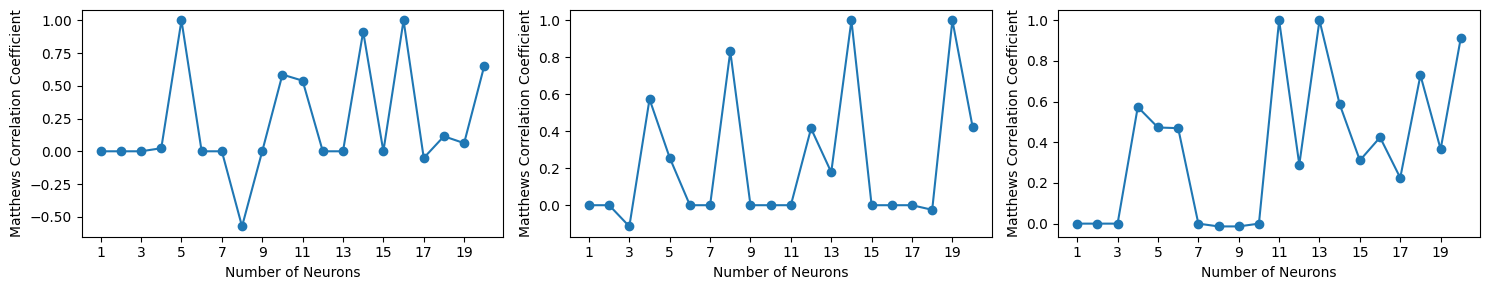

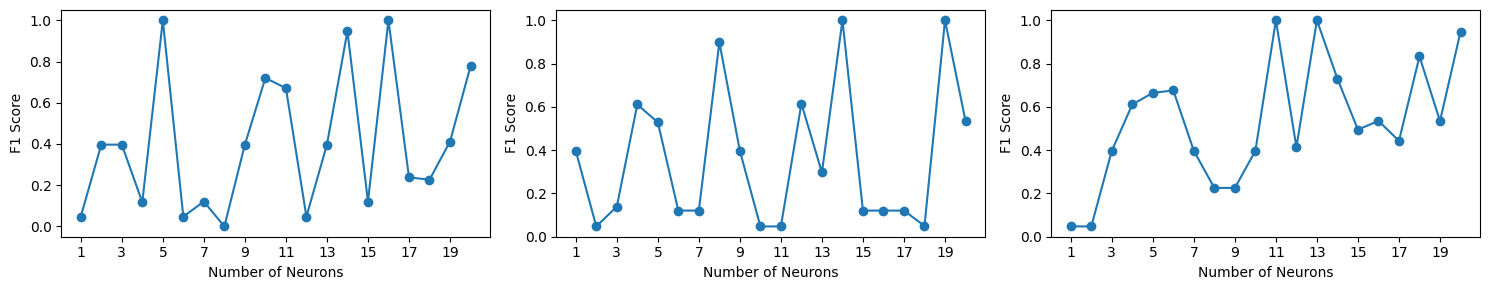

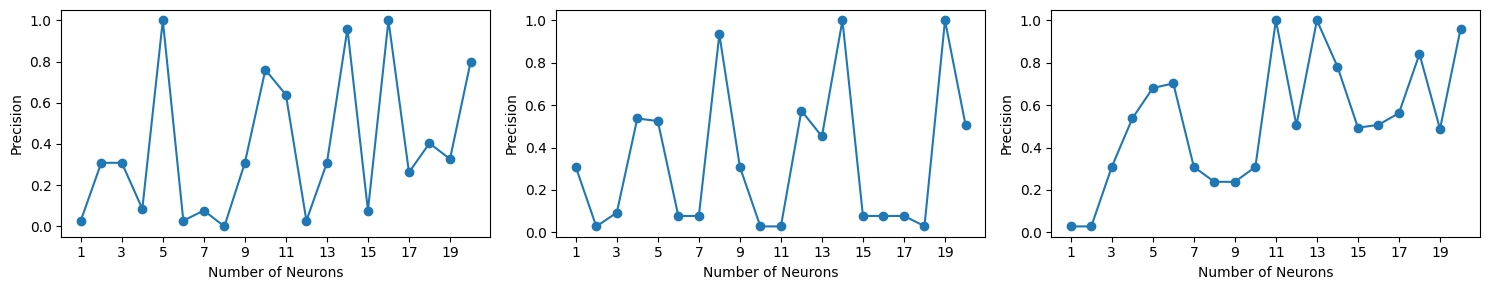

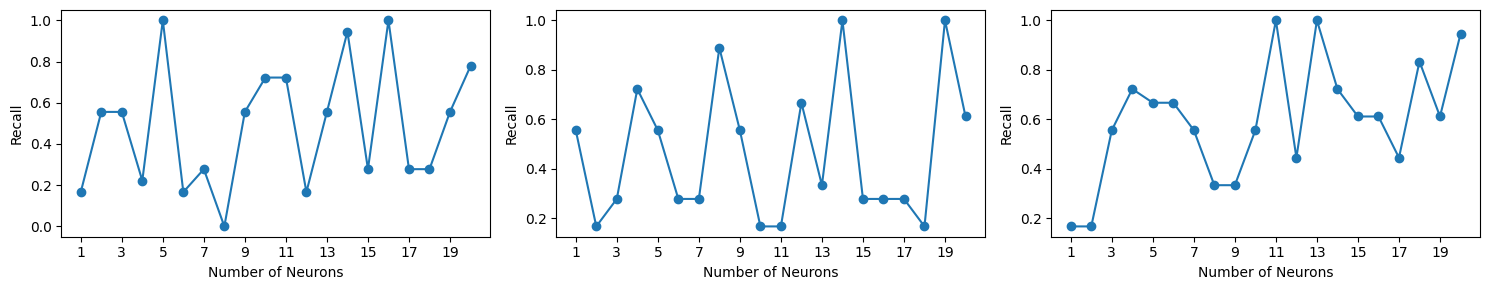

In [107]:
import warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning

# Suppress the specific UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize lists to store results
num_neurons_list = list(range(1, 21, 1))
accuracy_scores = []
kappa_scores = []
matthews_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for num_neurons in num_neurons_list:

    # %% Train model
    regr = MLPClassifier(hidden_layer_sizes=(num_neurons), random_state=1, max_iter=500)
    regr.fit(X_train, y_train)

    # %% Get model predictions
    y_pred = regr.predict(X_test)

    # %% Compute classification metrics
    acc_score = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    matthew = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(acc_score)
    kappa_scores.append(kappa)
    matthews_scores.append(matthew)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

for num_neurons in num_neurons_list:

    # %% Train model
    regr = MLPClassifier(hidden_layer_sizes=(num_neurons, num_neurons), random_state=1, max_iter=500)
    regr.fit(X_train, y_train)

    # %% Get model predictions
    y_pred = regr.predict(X_test)

    # %% Compute classification metrics
    acc_score = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    matthew = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(acc_score)
    kappa_scores.append(kappa)
    matthews_scores.append(matthew)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

for num_neurons in num_neurons_list:

    # %% Train model
    regr = MLPClassifier(hidden_layer_sizes=(num_neurons, num_neurons, num_neurons), random_state=1, max_iter=500)
    regr.fit(X_train, y_train)

    # %% Get model predictions
    y_pred = regr.predict(X_test)

    # %% Compute classification metrics
    acc_score = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    matthew = matthews_corrcoef(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(acc_score)
    kappa_scores.append(kappa)
    matthews_scores.append(matthew)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(num_neurons_list, accuracy_scores[0:20], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Accuracy")
plt.subplot(1, 3, 2)
plt.plot(num_neurons_list, accuracy_scores[20:40], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Accuracy")
plt.subplot(1, 3, 3)
plt.plot(num_neurons_list, accuracy_scores[40:60], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Accuracy")
plt.savefig('nn_accuracy.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(num_neurons_list, kappa_scores[0:20], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Kappa Score")
plt.subplot(1, 3, 2)
plt.plot(num_neurons_list, kappa_scores[20:40], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Kappa Score")
plt.subplot(1, 3, 3)
plt.plot(num_neurons_list, kappa_scores[40:60], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Kappa Score")
plt.savefig('nn_kappa.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(num_neurons_list, matthews_scores[0:20], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Matthews Correlation Coefficient")
plt.subplot(1, 3, 2)
plt.plot(num_neurons_list, matthews_scores[20:40], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Matthews Correlation Coefficient")
plt.subplot(1, 3, 3)
plt.plot(num_neurons_list, matthews_scores[40:60], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Matthews Correlation Coefficient")
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Matthews Correlation Coefficient")
plt.savefig('nn_matthews.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(num_neurons_list, f1_scores[0:20], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("F1 Score")
plt.subplot(1, 3, 2)
plt.plot(num_neurons_list, f1_scores[20:40], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("F1 Score")
plt.subplot(1, 3, 3)
plt.plot(num_neurons_list, f1_scores[40:60], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("F1 Score")
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("F1 Score")
plt.savefig('nn_f1.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(num_neurons_list, precision_scores[0:20], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Precision")
plt.subplot(1, 3, 2)
plt.plot(num_neurons_list, precision_scores[20:40], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Precision")
plt.subplot(1, 3, 3)
plt.plot(num_neurons_list, precision_scores[40:60], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Precision")
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Precision")
plt.savefig('nn_precision.png')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
plt.plot(num_neurons_list, recall_scores[0:20], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Recall")
plt.subplot(1, 3, 2)
plt.plot(num_neurons_list, recall_scores[20:40], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Recall")
plt.subplot(1, 3, 3)
plt.plot(num_neurons_list, recall_scores[40:60], marker='o')
plt.xlabel("Number of Neurons")
plt.xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19])
plt.ylabel("Recall")
plt.savefig('nn_recall.png')
plt.tight_layout()
plt.show()

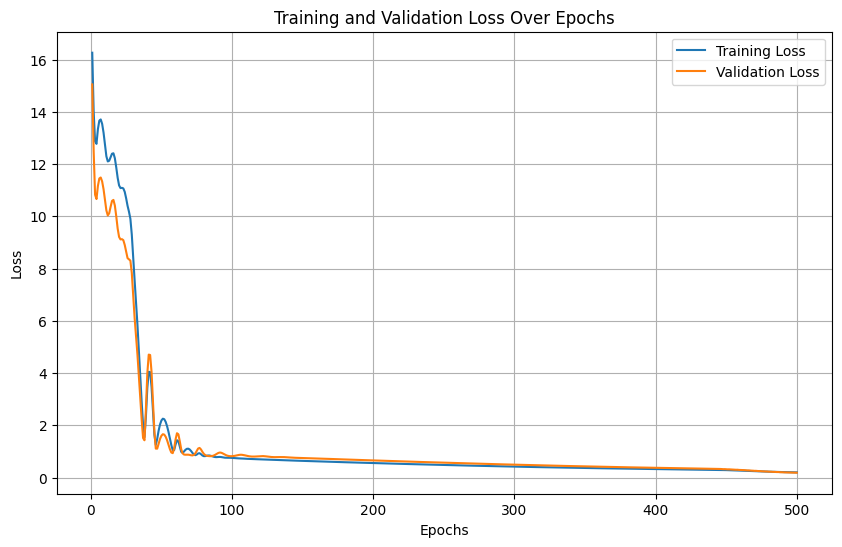

In [108]:
# Lists to store training and validation loss over iterations
train_losses = []
val_losses = []

# %% Train model
regr = MLPClassifier(hidden_layer_sizes=(14, 14), random_state=1, max_iter=500)

for epoch in range(1, 501):
    # Train the model on the training data
    regr.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Calculate the training loss
    y_train_pred = regr.predict_proba(X_train)
    train_loss = log_loss(y_train, y_train_pred)
    train_losses.append(train_loss)

     # Calculate the validation loss
    y_val_pred = regr.predict_proba(X_val)
    val_loss = log_loss(y_val, y_val_pred)
    val_losses.append(val_loss)

# %% Get model predictions
y_pred = regr.predict(X_test)

# %% Compute classification metrics
acc_score = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
matthew = matthews_corrcoef(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Plot training and validation loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), train_losses, label='Training Loss')
plt.plot(range(1, 501), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.savefig('nn_loss.png')
plt.show()

Validation loss on par or lower than training loss - this could be due to the L2 regularization that is done to the training